In [2]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [8]:
!python ../../scripts/mimiccxr/extract_labels_from_reports_with_fact_embedding.py \
--integrated_fact_metadata_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).improved_comparison(6526297).jsonl" \
--integrated_sentence_facts_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--paraphrases_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__single-words.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part2.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part3.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_observations__two-or-more-words__part4.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-0613_paraphrased_observations__two-or-more-words_cluster-balanced.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_1of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_2of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_3of5.jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words_cluster-balanced_4of5.jsonl" \
--model_name "cxr-bert-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20230823_124048_MIMIC-CXR(GPT3.5,GPT4,CXR-BERT,triplet_loss,ChestImaGenome,RadGraph)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/" \
--batch_size 400 \
--num_workers 3 \
--num_processes 10 \
--max_num_labels 5000 \
--num_kmeans_clusters__obs_sentences 200 \
--num_kmedoids_clusters__obs_sentences 4000 \
--num_kmeans_clusters__anatloc_sentences 50 \
--num_kmedoids_clusters__anatloc_sentences 300 \
--k_nearest_sentences 20

Loading paraphrases...
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part1.jsonl
len(paraphrases): 9891
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_anatomical_locations__part2.jsonl
len(paraphrases): 9890
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_anatomical_locations__part3.jsonl
len(paraphrases): 8511
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__single-words.jsonl
len(paraphrases): 1864
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-0613_paraphrased_observations__two-or-more-words__part1.jsonl
len(paraphrases): 14993
Loading paraphrases from: /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-3.5-turbo-16k-0613_paraphrased_o

In [24]:
from medvqa.utils.files import load_pickle, load_jsonl, load_json
import numpy as np
import random

### Inspecting sentece embeddings

In [25]:
sentence_embeddings = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/sentence_embeddings(hash=447,3362090641338804643).pkl')

In [26]:
sentence_embeddings.keys()

dict_keys(['sentences', 'embeddings'])

In [27]:
assert len(sentence_embeddings['sentences']) == len(sentence_embeddings['embeddings'])

In [28]:
print(len(sentence_embeddings['sentences']))
print(sentence_embeddings['embeddings'].shape)

2297179
(2297179, 128)


In [29]:
embeddings = sentence_embeddings['embeddings']
sentences = sentence_embeddings['sentences']
# i = random.randint(0, embeddings.shape[0]-1)
# i = sentences.index('focal widening')
# i = sentences.index('There is a notable enlargement of the spleen')
i = sentences.index('removal of a central venous line')
idxs = np.argsort(np.dot(embeddings[i], embeddings.T))[::-1]
print('Query:', sentences[i])
print('--------')
for idx in idxs[:30]:
    print(sentences[idx])

Query: removal of a central venous line
--------
removal of a central venous line
removal of an central venous line
removal of central venous line
removal of venous line
removal of the central venous line
removal of a venous line
discontinuation of central venous line
insertion of a central venous line
placement of a central venous line
removal of a central venous catheter line
placement of a tunneled central venous line
manipulation of the central venous line
central venous line removal
central venous line withdrawal
extraction of central venous lines
central venous line withdrawn
removal of central venous access lines
central venous line crossover
removing central venous lines
angulation of central venous line
withdrawn central venous line
removal of two central venous access lines
central venous line removed
insertion of central venous line
interval placement of a central venous access line
retainment of central venous line
central venous line has been placed
central venous line sho

### Inspecting observation clusters

In [11]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_obs_sentences(hash=263,2675795008307732991).pkl"

-rw-rw-r-- 1 pamessina pamessina 18M Aug 27 12:39 '/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_obs_sentences(hash=263,2675795008307732991).pkl'


In [12]:
kmeans_obs_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_obs_sentences(hash=263,2675795008307732991).pkl')

In [13]:
kmeans_obs_clustering.keys()

dict_keys(['sentence_idxs', 'labels', 'cluster_centers'])

In [14]:
label2idxs = dict()
for l,i in zip(kmeans_obs_clustering['labels'], kmeans_obs_clustering['sentence_idxs']):
    try:
        label2idxs[l].append(i)
    except KeyError:
        label2idxs[l] = [i]

In [15]:
len(label2idxs)

100

In [18]:
c = random.randint(0, len(label2idxs)-1)
idxs = label2idxs[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 22
len(idxs) = 33639

expansion loss at the lower parts
small atelectasis at the bases of the left lung
Compressive atelectasis is observed at the base of the left lung
The base of the left lung exhibits a mild atelectasis
pre-existing spot of plate-like pulmonary collapse
presumably some atelectasis
The underlying lung shows significant atelectasis
adjacent left lung base atelectasis
The basilar region of the lungs exhibits marked atelectasis
Both lung bases exhibit aggravated atelectasis
atelectasis at the right lung base medially
An opacity in the left basilar region is indicative of atelectasis
atelectasis cleared by worsened on
Partial lung collapse noted on the left
basal infiltrate and partial collapse of the right lung
partial atelectatic collapse
The right lower lobe atelectasis is more visible
New mild airway collapse at the lower parts of both lungs
Retrocardiac area of the lungs exhibits slight atelectasis
relatively extensive atelectasis


In [19]:
kmedoids_obs_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_clustering_anatloc_sentences(hash=347,3302427387281192803).pkl')

In [20]:
kmedoids_obs_clustering.keys()

dict_keys(['subclusters'])

In [21]:
kmedoids_obs_clustering['subclusters'][0].keys()

dict_keys(['sentence_idxs', 'labels', 'cluster_centers'])

In [22]:
label2idxs_2 = dict()
offset = 0
for sc in kmedoids_obs_clustering['subclusters']:
    for l,i in zip(sc['labels'], sc['sentence_idxs']):
        try:
            label2idxs_2[l + offset].append(i)
        except KeyError:
            label2idxs_2[l + offset] = [i]
    offset += len(set(sc['labels']))

In [129]:
# c = random.randint(0, len(label2idxs_2)-1)
c = 39
idxs = label2idxs_2[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 39
len(idxs) = 469

right T9 rib transverse joint
right lateral region of the eleventh thoracic vertebra
right paramedian at the level of T12
right lumbar region of the back
right side of the thoracic spine in the lower area
right T12
right of the mid-thoracic vertebral region
right lateral to T9
right side of the T12/L1 vertebral level
posterior connection points of the right upper ribs and the vertebrae
right margin of the T12/L1 disc space
right anterolateral thoracic spine
right mid thoracic spine
right thoracic spine
right mid thoracic spinal column
right side of the body at the T12 level
right side of a lower thoracic spinal segment
right ventrolateral area of the T5 vertebra
right lateral margin of the T12/L1 disc space
right of the midline at the twelfth thoracic vertebra


### Inspecting anatomical location clusters

In [24]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_anatloc_sentences(hash=265,648587225485942165).pkl"

-rw-rw-r-- 1 pamessina pamessina 2.6M Aug 27 13:12 '/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_anatloc_sentences(hash=265,648587225485942165).pkl'


In [25]:
kmeans_anatloc_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmeans_clustering_anatloc_sentences(hash=265,648587225485942165).pkl')

In [26]:
kmeans_anatloc_clustering.keys()

dict_keys(['sentence_idxs', 'labels', 'cluster_centers'])

In [27]:
label2idxs_3 = dict()
for l,i in zip(kmeans_anatloc_clustering['labels'], kmeans_anatloc_clustering['sentence_idxs']):
    try:
        label2idxs_3[l].append(i)
    except KeyError:
        label2idxs_3[l] = [i]

In [28]:
len(label2idxs_3)

50

In [29]:
c = random.randint(0, len(label2idxs_3)-1)
idxs = label2idxs_3[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 7
len(idxs) = 12225

upper segment of lumbar spinal implants
superior endplate of the first lumbar vertebra
vertebral bodies in the neck
transverse process at the level of the seventh neck vertebral body
angle at the back and bottom of a mid thoracic vertebra
rib-spine interface
neck spine in the posterior position
thoracic area of the vertebral column
thoracic and lumbar junction between T9 and L2
upper margins of the thoracic vertebral bodies
lowermost lumbar vertebra
situated posterior to the assumed L2 vertebral body
cervical level of the spine
rib vertebral junction
to the right of the T3 vertebra
vertebral segment
T3 level
superior to the first thoracic vertebra
thoracic spine above T6
disc in the spine


In [30]:
kmedoids_anatloc_clustering = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_clustering_anatloc_sentences(hash=347,3302427387281192803).pkl')

In [31]:
label2idxs_4 = dict()
offset = 0
for sc in kmedoids_anatloc_clustering['subclusters']:
    for l,i in zip(sc['labels'], sc['sentence_idxs']):
        try:
            label2idxs_4[l + offset].append(i)
        except KeyError:
            label2idxs_4[l + offset] = [i]
    offset += len(set(sc['labels']))

In [36]:
c = random.randint(0, len(label2idxs_4)-1)
idxs = label2idxs_4[c]
print('c =', c)
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

c = 259
len(idxs) = 867

left perihilum region
left perihilar region of the lung parenchyma
left perihilar and lower pulmonary
peri-hilar region in the left mid lung
perihilar region of the left lung
left perihilar bronchovascular infiltrates
left peri-hilum pulmonary lobes
peribronchial region of the left lung
left perihilum area
peri-hilar area of the left mid lobe
left perihilar lung segment
left superhilar region
vicinity of the pulmonary hilum in the left mid zone
left peri- and sub-hilar regions
left lung base in the subhilum zone
left lower perihilar zone
left perihilar areas
left perihilar pulmonary parenchyma
left perihilar lung territory
left mediastinal area above the pulmonary hilum


### Inspecting closest cluster center to each sentence

In [156]:
ccc_obs = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(obs_sentences,obs_clusters)(hash=350,1563122386020285354).pkl')

In [157]:
ccc_obs.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [153]:
kmros = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1009805253949570147).pkl')

In [154]:
kmros.keys()

dict_keys(['refined_cluster_centers', 'refined_cluster_center_sentence_idxs', 'refined_cluster_center_sentences'])

In [155]:
len(kmros['refined_cluster_center_sentences'])

1040

In [159]:
i = random.randint(0, len(ccc_obs['sentence_idxs'])-1)
print(sentences[ccc_obs['sentence_idxs'][i]])
print()
print(kmros['refined_cluster_center_sentences'][ccc_obs['closest_cluster_centers'][i]])

small bilateral apicolateral pneumothoraces

apical pneumothorax is small


In [160]:
ccc2idxs = dict()
for i, c in zip(ccc_obs['sentence_idxs'], ccc_obs['closest_cluster_centers']):
    try:
        ccc2idxs[c].append(i)
    except KeyError:
        ccc2idxs[c] = [i]

In [169]:
idxs = ccc2idxs[26]
print('len(idxs) =',  len(idxs))
print()
for i in random.sample(idxs, 20):
    print(sentences[i])

len(idxs) = 2045

esophageal enlargement with fluid
extended recess
There is a minor enlargement in the fissural component
enlargement similar to the earliest study
There is a notable enlargement of the spleen
increased anterior clear space
The focal area is getting worse
There is a noticeable increase in the size of the pseudoaneurysm
pulmonary dilatation
widening of the space
small area of central lucency
Enlarged, which is in line with recent post-op state
potential dilatation
larger than usual postoperative retrosternal hematoma
Enlargement can be observed in the area that is partially visualized
prominence right greater than left
Subtle widening of the disc space anteriorly
decreased size of the rounded area of lucency
increased thoracic AP diameter
rounded enlarged contour


In [168]:
assert any('mild pectus deformity' == sentences[i] for i in idxs)

In [68]:
ccc_anatloc = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(anatloc_sentences,anatloc_clusters)(hash=360,736789472007516774).pkl')

In [69]:
ccc_anatloc.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [70]:
kmrals = load_pickle('/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,971968635628419461).pkl')

In [81]:
i = random.randint(0, len(ccc_anatloc['sentence_idxs'])-1)
print(sentences[ccc_anatloc['sentence_idxs'][i]])
print()
print(kmrals['refined_cluster_center_sentences'][ccc_anatloc['closest_cluster_centers'][i]])

soft tissues of the lower right neck

structures in the right side of the neck


### Inspecting mapping of facts to labels

In [147]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,123081148436822053).pkl"

-rw-rw-r-- 1 pamessina pamessina 55M Aug 27 16:42 '/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,123081148436822053).pkl'


In [148]:
cblpf = load_pickle("/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,123081148436822053).pkl")

In [149]:
cblpf.keys()

dict_keys(['fact2labels', 'obs_al2fact'])

In [150]:
len(cblpf['fact2labels']), len(cblpf['obs_al2fact'])

(578715, 29543)

In [151]:
facts = list(cblpf['fact2labels'].keys())

In [152]:
# f = facts[0]
# f = random.choice(facts)
f = 'mild pectus deformity'
labels = cblpf['fact2labels'][f]

print(f)
print()

if 'fact_ccid' in labels:
    print(kmros['refined_cluster_center_sentences'][labels['fact_ccid']])
if 'detailed_obs_ccid' in labels:
    print(kmros['refined_cluster_center_sentences'][labels['detailed_obs_ccid']])
if 'short_obs_ccid' in labels:
    print(kmros['refined_cluster_center_sentences'][labels['short_obs_ccid']])
if 'anatloc_ccid' in labels:
    print(kmrals['refined_cluster_center_sentences'][labels['anatloc_ccid']])
if 'fact_ccid' in labels and 'anatloc_ccid' in labels:
    print(cblpf['obs_al2fact'][(labels['fact_ccid'], labels['anatloc_ccid'])])

mild pectus deformity

lower low volumes
lower low volumes
lower low volumes


### Inspecting mapping of reports to labels

In [172]:
!ls -lh "/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,2115706512139644026).pkl"

-rw-rw-r-- 1 pamessina pamessina 57M Aug 27 17:42 '/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,2115706512139644026).pkl'


In [173]:
cblpr = load_pickle("/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,2115706512139644026).pkl")

In [174]:
cblpr.keys()

dict_keys(['top_label_names', 'top_label_ids', 'top_label_counts', 'labeled_reports'])

In [175]:
len(cblpr['top_label_names'])

5000

In [176]:
cblpr['top_label_counts'][-10:]

[25, 25, 25, 25, 25, 25, 25, 25, 25, 25]

In [177]:
label_id_2_name = {x:y for x, y in zip(cblpr['top_label_ids'], cblpr['top_label_names'])}

In [184]:
i = 3
# i = random.randint(0, len(cblpr['labeled_reports'])-1)
with open(cblpr['labeled_reports'][i]['report_path']) as f:
    print(f.read())
print()
for label in cblpr['labeled_reports'][i]['labels']:
    print(label_id_2_name[label])

                                 FINAL REPORT
 EXAMINATION:  CHEST (PA AND LAT)
 
 INDICATION:  History: ___M with sepsis
 
 TECHNIQUE:  Chest PA and lateral
 
 COMPARISON:  None.
 
 FINDINGS: 
 
 Lung volumes are low.  This accentuates the size of the cardiac silhouette
 which is borderline enlarged.  Mediastinal and hilar contours are normal. 
 Pulmonary vasculature is normal.  Lungs are clear.  No pleural effusion or
 pneumothorax is present.  No acute osseous abnormality is visualized.
 
 IMPRESSION: 
 
 Low lung volumes.  No acute cardiopulmonary process.


normal hilar silhouette
normal hilar size
normal lung
normal hilar
mediastinal contours normal
The size of the heart silhouette is slightly increased compared to previous
No pneumothorax seen
small heart size
moderate size of the cardiac silhouette
no abnormality in the lungs
no cardiopulmonary process
lungs in low lung volume
bony structures unremarkable
no over pleural effusion
lung volumes
decreased cardiac silhouette enlarg

In [112]:
tmp = load_jsonl('/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl')

In [114]:
for x in tmp:
    if x['sentence'] == 'There is a mild pectus deformity.':
        print(x)
        break

{'sentence': 'There is a mild pectus deformity.', 'facts': ['mild pectus deformity'], 'extraction_method': 't5-small-finetuned'}


In [162]:
cblpf['fact2labels']['mild pectus deformity']

{'fact_ccid': 26, 'short_obs_ccid': 26, 'detailed_obs_ccid': 26}

In [163]:
label_id_2_name[26]

'focal widening'

In [118]:
len(cblpf['fact2labels'])

578715

In [122]:
reports = load_json("/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json")

In [124]:
reports[1]

{'background': 'indication: Chest pain.',
 'findings': 'There is a mild pectus deformity. The heart size is normal. The hilar and mediastinal contours are within normal limits. There is no pneumothorax, focal consolidation, or pleural effusion.',
 'impression': 'No acute intrathoracic process.',
 'path': '/mnt/data/mimic-cxr/files/p10/p10703179/s55231872.txt'}

### Visualize Cluster Embedding

In [19]:
from medvqa.evaluation.plots import plot_embeddings_and_clusters
from medvqa.utils.files import get_cached_pickle_file

In [23]:
sentence_embeddings = get_cached_pickle_file('/home/pamessina/medvqa-workspace/cache/mimiccxr/sentence_embeddings(hash=447,3362090641338804643).pkl')

In [24]:
ccc_obs = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(obs_sentences,obs_clusters)(hash=350,2624655035329110421).pkl")

In [25]:
ccc_obs.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [20]:
kmros = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1030995114106135507).pkl")

In [21]:
kmros.keys()

dict_keys(['refined_cluster_centers', 'refined_cluster_center_sentence_idxs', 'refined_cluster_center_sentences'])

In [22]:
kmros['refined_cluster_centers'].shape

(3983, 128)

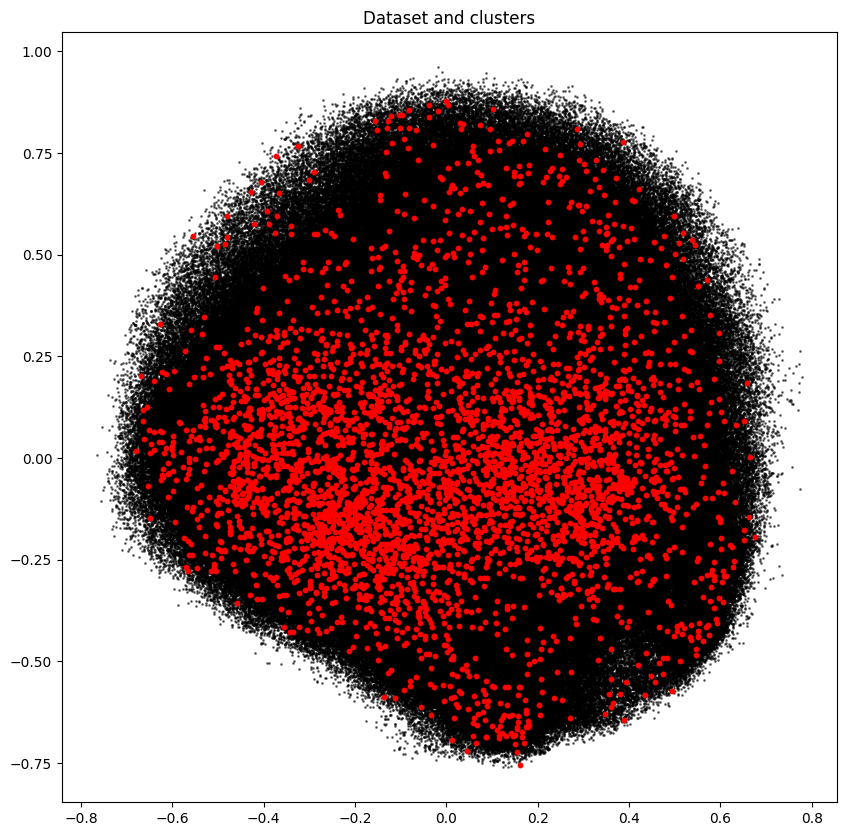

In [27]:
plot_embeddings_and_clusters(
    X_dataset=sentence_embeddings['embeddings'][ccc_obs['sentence_idxs']],
    X_clusters=kmros['refined_cluster_centers'],
)

In [28]:
ccc_anatloc = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/closest_cluster_centers_(anatloc_sentences,anatloc_clusters)(hash=361,3925806207436708715).pkl")

In [29]:
ccc_anatloc.keys()

dict_keys(['sentence_idxs', 'closest_cluster_centers'])

In [30]:
kmrals = get_cached_pickle_file("/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,3726127490722775315).pkl")

In [31]:
kmrals.keys()

dict_keys(['refined_cluster_centers', 'refined_cluster_center_sentence_idxs', 'refined_cluster_center_sentences'])

In [32]:
kmrals['refined_cluster_centers'].shape

(326, 128)

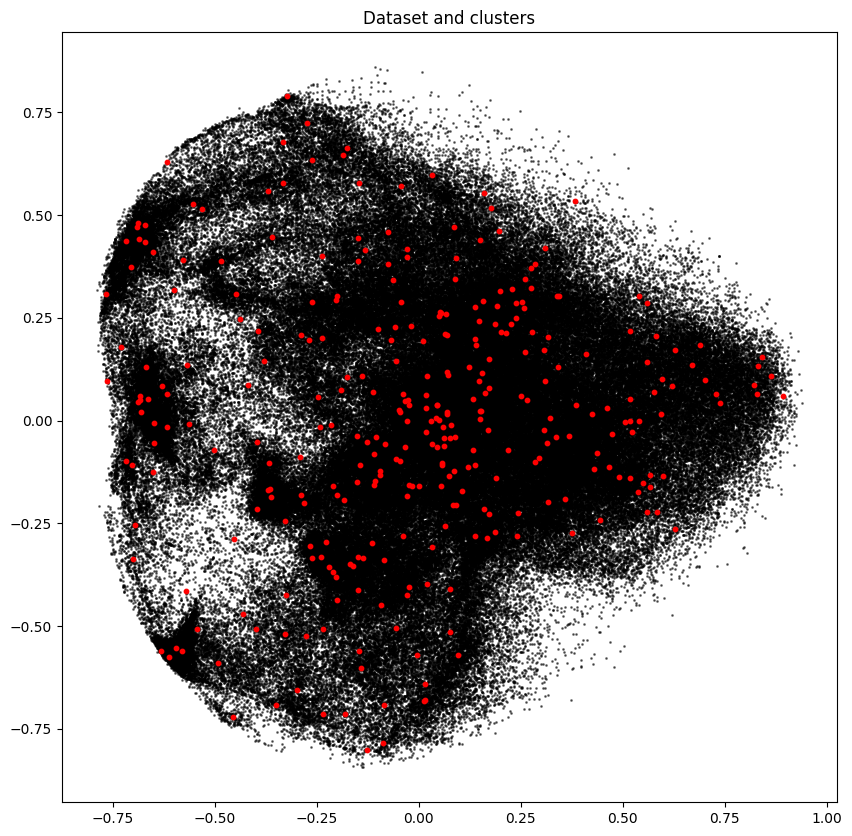

In [33]:
plot_embeddings_and_clusters(
    X_dataset=sentence_embeddings['embeddings'][ccc_anatloc['sentence_idxs']],
    X_clusters=kmrals['refined_cluster_centers'],
)

### Integrated Report Visualizer

In [9]:
from medvqa.scripts.mimiccxr.extract_labels_from_reports_with_fact_embedding import ClusteringBasedLabelVisualizer

In [10]:
from importlib import reload
import medvqa

In [13]:
reload(medvqa.scripts.mimiccxr.extract_labels_from_reports_with_fact_embedding)

<module 'medvqa.scripts.mimiccxr.extract_labels_from_reports_with_fact_embedding' from '/home/pamessina/medvqa/medvqa/scripts/mimiccxr/extract_labels_from_reports_with_fact_embedding.py'>

In [11]:
cblvis = ClusteringBasedLabelVisualizer(
    background_findings_and_impression_per_report_filepath="/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json",
    integrated_sentence_facts_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl",
    integrated_fact_metadata_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).improved_comparison(6526297).jsonl",
    kmedoids_refinement_obs_sentences_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1030995114106135507).pkl",
    kmedoids_refinement_anatloc_sentences_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,3726127490722775315).pkl",
    cluster_based_labels_per_fact_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,3278779731031616801).pkl",
    cluster_based_labels_per_report_filepath="/home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,3753455556037768241).pkl",
)

Loading /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(58655550,49840052).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_fact_metadata(578733,58628071).improved_comparison(6526297).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_fact(hash=604,3278779731031616801).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_obs_sentences(hash=488,1030995114106135507).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/kmedoids_refinement_anatloc_sentences(hash=489,3726127490722775315).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/cluster_based_labels_per_report(hash=550,3753455556037768241).pkl...


In [16]:
cblvis.display_report()

i = 202526
Report path:
/mnt/data/mimic-cxr/files/p18/p18230008/s50532828.txt

Original report:
                                 FINAL REPORT
 INDICATION:  Fall one week ago with rib pain.  Evaluate for fractures.
 
 COMPARISONS:  Chest radiograph from ___.
 
 TECHNIQUE:  AP and lateral views of the chest were obtained.
 
 FINDINGS:  The lung volumes are low and there is right greater than left
 bibasilar atelectasis.  There is no pulmonary edema, pleural effusion, or
 pneumothorax.  The cardiomediastinal contours are normal. No rib fracture is
 identified, although the lower ribs are not well assessed and CT or dedicated
 rib series is more sensitive.  The vertebral body heights are maintained. 
 Alignment of the thoracic spine is normal.
 
 IMPRESSION:
 1.  Right greater than left bibasilar atelectasis.
 2.  No displaced rib fracture seen,  although the lower ribs are not well
 assessed and CT or dedicated rib series is more sensitive


Background:
indication: Fall one week ago with 